# Capstone 1: Statistical Data Analysis

In this section, we look at the correlations looked at in the previous sectiona nd try to test their statistical significance. We will also capture new correlations

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


In [204]:
import ast
def str2list(text):
    # print(text)
    init_ls = text.strip('[]').split(',')
    #print (init_ls[1])
    final_ls = [X.strip(' ').strip('\'') for X in init_ls]
    # print(final_ls[1])
    tag_ls = ['tag_'+X for X in final_ls]
    return tag_ls
        

In [205]:
# Read the output of Data Storytelling
df_clean = pd.read_csv(r'After_Storytelling.csv', index_col = 0)
df_clean.index.name = "index"

In [206]:
print ('Shape is', df_clean.shape)
df_clean.head(3)

Shape is (2314, 34)


,description,duration,event,main_speaker,speaker_occupation,tags,title,transcript,film_datestamp,pub_datestamp,...,Confusing,Informative,Fascinating,Unconvincing,OK,Inspiring,event_type,Max_rating,ratings_total,word_per_min
index,,,,,,,,,,,,,,,,,,,,,
0,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,Ken Robinson,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,2006-02-25 00:00:00,2006-06-27 00:11:00,...,0.007035,0.082160,0.118341,0.005693,0.013130,0.398474,TED,Inspiring,89411,163
1,With the same humor and humanity he exuded in ...,977,TED2006,Al Gore,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",2006-02-25 00:00:00,2006-06-27 00:11:00,...,0.062057,0.157092,0.046809,0.137943,0.071986,0.241489,TED,Inspiring,2820,127
2,New York Times columnist David Pogue takes aim...,1286,TED2006,David Pogue,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006-02-24 00:00:00,2006-06-27 00:11:00,...,0.037906,0.142599,0.059928,0.088809,0.052708,0.166065,TED,Funny,2770,157


# Parse Tags

In [207]:
df_clean.tags = df_clean.tags.apply(str2list)

In [208]:
tags_all = df_clean.tags
tag_dict = {}

In [209]:
for ls_tags in tags_all:
    for tag in ls_tags:
        if tag in tag_dict:
            tag_dict[tag] = tag_dict[tag]+1
        else:
            tag_dict[tag] = 0


In [210]:
print ('We have %d unique tags assigned to all the talks'%len(tag_dict))

We have 416 unique tags assigned to all the talks


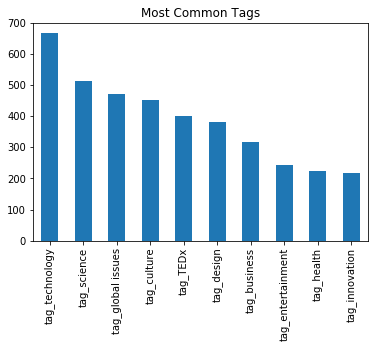

In [211]:
pd.Series(tag_dict).sort_values(ascending = False)[0:10].plot.bar(title = 'Most Common Tags')

 We will try to see whether a particular tag is indicative of different ratings

In [212]:
df_clean.columns

Index(['description', 'duration', 'event', 'main_speaker',
       'speaker_occupation', 'tags', 'title', 'transcript', 'film_datestamp',
       'pub_datestamp', 'sentence_count', 'word_count', 'applause', 'laughter',
       'music', 'cheering', 'sighs', 'singing', 'video', 'audio', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Confusing', 'Informative',
       'Fascinating', 'Unconvincing', 'OK', 'Inspiring', 'event_type',
       'Max_rating', 'ratings_total', 'word_per_min'],
      dtype='object')

In [213]:
# Create Binary columns for top tags
df_clean['tag_technology'] = ['tag_technology' in ls for ls in df_clean.tags]
df_clean['tag_science'] = ['tag_science' in ls for ls in df_clean.tags]
df_clean['tag_global issues'] = ['tag_global issues' in ls for ls in df_clean.tags]
df_clean['tag_culture'] = ['tag_culture' in ls for ls in df_clean.tags]
df_clean['tag_design'] = ['tag_design' in ls for ls in df_clean.tags]
df_clean['tag_business'] = ['tag_business' in ls for ls in df_clean.tags]
df_clean['tag_entertainment'] = ['tag_entertainment' in ls for ls in df_clean.tags]

## Hypothesis Testing

We would like to see if talks with each of the tags score differently compared to talks without the tag for each of our rating of interest. In other words, we would like to ask the following questions


Q1 : Are talks with tag 'technology' score differently compared to talks without this tag on the rating 'Informative'? 

Null Hypotheis : Talks with and without 'technology' tag score similar on 'Informative

Alt Hypotheis : Two groups are different

In [214]:
tech = df_clean[df_clean['tag_technology'] == True]
non_tech = df_clean[df_clean['tag_technology'] != True]

In [215]:
# The mean rating for each is
print ('Talks with technology tag have average \'Informative\' rating of', tech.Informative.mean())
print ('Talks without technology tag have average \'Informative\' rating of', non_tech.Informative.mean())

Talks with technology tag have average 'Informative' rating of 0.19825628772971002
Talks without technology tag have average 'Informative' rating of 0.16873213163606943


In [216]:
# Performing a t-test to chcek if the differences are statistically significant
from scipy.stats import ttest_ind
test_res = ttest_ind(tech.Informative, non_tech.Informative, equal_var = False)

test_res

Ttest_indResult(statistic=6.227420675983781, pvalue=6.344877075326349e-10)

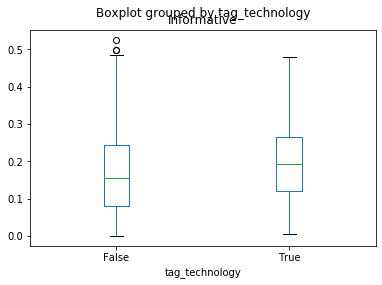

In [217]:
df_clean.boxplot('Informative', 'tag_technology', grid = False)

As can be seen from the test, we see that talks which have 'technology' as tag scored higher on 'Informative' ratings compared to those without this. In other words, we reject null hypotheis. 
Lets similarly ask other questions

Q2 : Do talks with tag 'design' score differently on 'inspiring' compared to talks without?


In [218]:
design = df_clean[df_clean['tag_design'] == True]
non_design = df_clean[df_clean['tag_design'] != True]
# Calculate mean ratings
print ('Talks with design tag have average \'Inspiring\' rating of', tech.Inspiring.mean())
print ('Talks without design tag have average \'Inspiring\' rating of', non_tech.Inspiring.mean())

Talks with design tag have average 'Inspiring' rating of 0.25009760650748375
Talks without design tag have average 'Inspiring' rating of 0.3089004829246212


In [219]:
# Check statistical significance
test_res = ttest_ind(design.Inspiring, non_design.Inspiring, equal_var = False)
test_res

Ttest_indResult(statistic=-6.615982464579601, pvalue=8.34047782299715e-11)

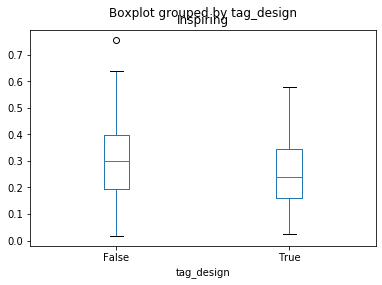

In [220]:
df_clean.boxplot('Inspiring', 'tag_design', grid = False)
# plt.title ('BoxPlot, \'Inspiring\' rating by tag_design')

We see that talks without design as tag score higher on 'Inspiring' than those with. This is counterintuitive

Finally, we calculate biserial correlation matrix for  all tags and ratings


In [221]:
df_clean.columns

Index(['description', 'duration', 'event', 'main_speaker',
       'speaker_occupation', 'tags', 'title', 'transcript', 'film_datestamp',
       'pub_datestamp', 'sentence_count', 'word_count', 'applause', 'laughter',
       'music', 'cheering', 'sighs', 'singing', 'video', 'audio', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Confusing', 'Informative',
       'Fascinating', 'Unconvincing', 'OK', 'Inspiring', 'event_type',
       'Max_rating', 'ratings_total', 'word_per_min', 'tag_technology',
       'tag_science', 'tag_global issues', 'tag_culture', 'tag_design',
       'tag_business', 'tag_entertainment'],
      dtype='object')

In [222]:
from scipy.stats import pointbiserialr

tag_list = ['tag_technology','tag_science','tag_global issues','tag_culture','tag_design','tag_business', 
            'tag_entertainment']
rating_list = ['Funny','Beautiful', 'Ingenious', 'Courageous', 'Confusing', 'Informative',
       'Fascinating', 'Unconvincing', 'OK', 'Inspiring']
biserial_dict = {}
biserial_dict['Tags'] = tag_list
for rating in rating_list:
    biserial_dict[rating] = []
    for tag in tag_list:
        biserial_corr = pointbiserialr(df_clean[tag], df_clean[rating])
        biserial_dict[rating].append(biserial_corr[0])

# pd.dataframe(biserial_dict)
corr_df = pd.DataFrame(biserial_dict).set_index('Tags')   
corr_df

,Funny,Beautiful,Ingenious,Courageous,Confusing,Informative,Fascinating,Unconvincing,OK,Inspiring
Tags,,,,,,,,,,
tag_technology,-0.077447,-0.199291,0.347746,-0.212036,0.057039,0.124235,0.272651,0.029064,0.064645,-0.206906
tag_science,-0.038817,-0.129532,0.077483,-0.212466,-0.004574,0.272969,0.388594,-0.090441,-0.058408,-0.224719
tag_global issues,-0.165685,-0.122007,-0.135463,0.197082,0.012107,0.051906,-0.225305,0.071963,-0.059134,0.236514
tag_culture,0.070916,0.021371,-0.136742,0.044948,0.088270,-0.102833,-0.101324,0.076593,0.017940,0.076690
tag_design,-0.001546,0.022061,0.327592,-0.184017,0.124349,-0.126397,0.096839,0.053155,0.099443,-0.127130
tag_business,-0.028980,-0.190377,-0.018569,-0.055528,0.024213,0.109540,-0.134803,0.032928,0.030059,0.155670
tag_entertainment,0.328157,0.175351,0.027833,-0.080267,0.063878,-0.261681,0.012203,0.050320,0.115225,-0.169923


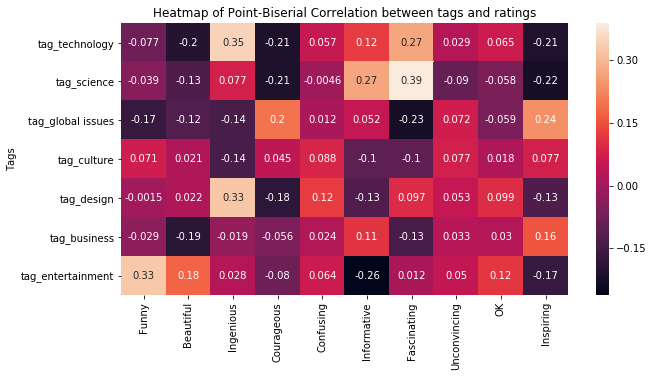

In [225]:
_ = plt.figure(figsize = (10,5))
_ = plt.title("Heatmap of Point-Biserial Correlation between tags and ratings")
sns.heatmap(corr_df, annot = True)

## Conclusion

As we can see we can use statistical methods to get useful insights into our data. We see that the tag 'science' is correlated to 'Fascinating'. Similarly, 'Global Issues' is correlated to 'Inspiring'. Unexpected result is the negative correlation between 'science' and 'inspiring'. 'Funny' and 'entertainment' are also correlated

Finally, lets drop the extra columns and get ready for applying machine learning to the data

In [226]:
# Keep the three ratings of interest and drop the rest
# Keep the following ratings : Inspiring, Informative and Funny
df_clean.drop(['Beautiful', 'Ingenious', 'Courageous', 'Confusing', 
       'Fascinating', 'Unconvincing', 'OK'], axis = 1, inplace = True)

In [227]:
# Write to file
df_clean.to_csv('After_StatisticalAnalysis.csv')